C:\Users\Grandiose\AppData\Local\Temp\ipykernel_7984\1099263075.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('aspect_bin')['mean_temperature'].mean().reset_index()


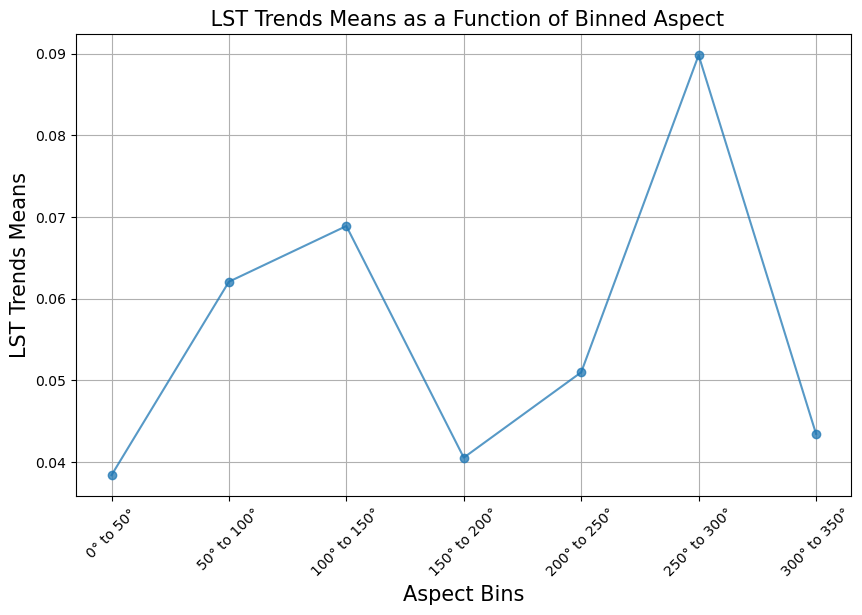

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
aspect_file_path = r'E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\elevation_aspect_slope\elevation-aspect-slope-80 stations_sorted.csv'
mean_file_path = r'E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\station_slopes.csv'

# Load data
aspect_df = pd.read_csv(aspect_file_path)
mean_df = pd.read_csv(mean_file_path)

# Rename the station column if needed for consistency
mean_df.rename(columns={mean_df.columns[0]: 'Station'}, inplace=True)

# Assuming the mean data is in the first data column after station names in mean_df
mean_column = mean_df.columns[1]  # Adjust if the mean column is located elsewhere

# Merge the dataframes on the 'Station' column
merged_df = pd.merge(aspect_df[['Station', 'aspect']], mean_df[['Station', mean_column]], on='Station')

# Create a DataFrame with the aspect and mean temperature data
df = pd.DataFrame({'aspect': merged_df['aspect'], 'mean_temperature': merged_df[mean_column]})

# Create bins for aspects with a width of 50 degrees
bin_size = 50
bins = range(int(df['aspect'].min() // bin_size) * bin_size, int(df['aspect'].max() // bin_size) * bin_size + bin_size, bin_size)
labels = [f"{i}° to {i + bin_size}°" for i in bins[:-1]]

# Assign each aspect to its corresponding bin
df['aspect_bin'] = pd.cut(df['aspect'], bins=bins, labels=labels, right=False)

# Group by the binned aspect and calculate the mean temperature for each bin
grouped_df = df.groupby('aspect_bin')['mean_temperature'].mean().reset_index()

# Plot the mean temperature as a function of binned aspect
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['aspect_bin'], grouped_df['mean_temperature'], marker='o', linestyle='-', alpha=0.75)
plt.title(' LST Trends Means as a Function of Binned Aspect', fontsize=15)
plt.xlabel('Aspect Bins', fontsize=15)
plt.ylabel('LST Trends Means', fontsize=15)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()


C:\Users\Grandiose\AppData\Local\Temp\ipykernel_7984\2911207248.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('angle_bin')['lst_data'].mean().reset_index()
C:\Users\Grandiose\AppData\Local\Temp\ipykernel_7984\2911207248.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('angle_bin')['lst_data'].mean().reset_index()
C:\Users\Grandiose\AppData\Local\Temp\ipykernel_7984\2911207248.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obs

Skipping mean_temperatures.csv: single positional indexer is out-of-bounds
Skipping mean_temperature_trends_by_hour.csv: agg function failed [how->mean,dtype->object]


C:\Users\Grandiose\AppData\Local\Temp\ipykernel_7984\2911207248.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('angle_bin')['lst_data'].mean().reset_index()
C:\Users\Grandiose\AppData\Local\Temp\ipykernel_7984\2911207248.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('angle_bin')['lst_data'].mean().reset_index()
C:\Users\Grandiose\AppData\Local\Temp\ipykernel_7984\2911207248.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obs

Skipping station_slopes.csv: single positional indexer is out-of-bounds


C:\Users\Grandiose\AppData\Local\Temp\ipykernel_7984\2911207248.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('angle_bin')['lst_data'].mean().reset_index()
C:\Users\Grandiose\AppData\Local\Temp\ipykernel_7984\2911207248.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df = df.groupby('angle_bin')['lst_data'].mean().reset_index()
C:\Users\Grandiose\AppData\Local\Temp\ipykernel_7984\2911207248.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or obs

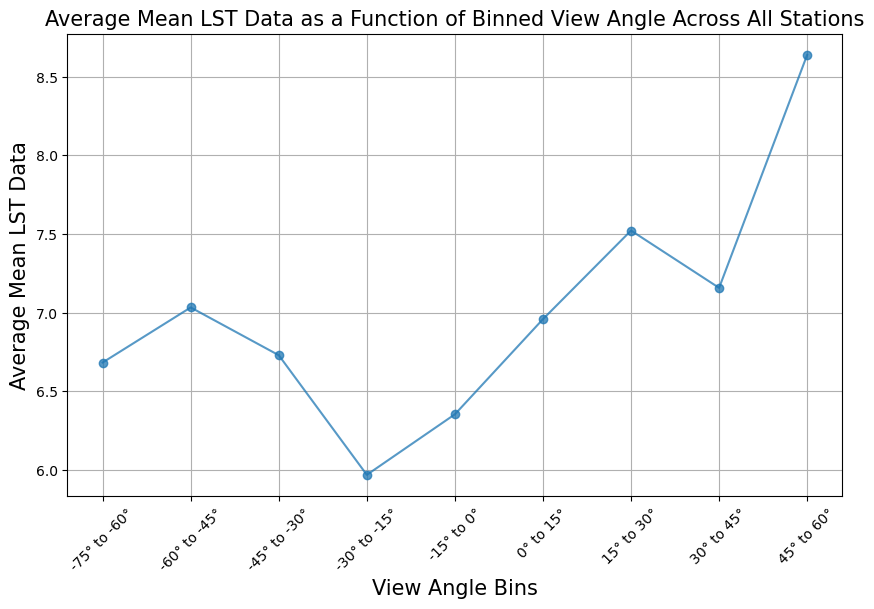

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Directory containing all CSV files for different stations
directory_path = r'E:\all folders\STUDIES\UZH\master thesis\MODIS DATA\Actual Data\MYD21A1D\Filtered_Data'

# Create an empty list to store the mean LST for each station
all_station_means = []

# Define fixed bin range from -75 to 75 with a width of 15 degrees
bin_size = 15
bins = range(-75, 76, bin_size)  # from -75 to 75 inclusive
labels = [f"{i}° to {i + bin_size}°" for i in bins[:-1]]

# Loop over all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):  # Only process CSV files
        file_path = os.path.join(directory_path, filename)

        try:
            # Read the CSV file
            data = pd.read_csv(file_path)

            # Extract LST data and view angle
            lst_data = data.iloc[:, 2]  # LST data is in the column with index 2
            view_angle = data.iloc[:, 3]  # View angle is in the column with index 3

            # Create a DataFrame with the LST data and view angle
            df = pd.DataFrame({'view_angle': view_angle, 'lst_data': lst_data})

            # Assign each view angle to its corresponding bin
            df['angle_bin'] = pd.cut(df['view_angle'], bins=bins, labels=labels, right=False)

            # Group by the binned view angle and calculate the mean LST for each bin
            grouped_df = df.groupby('angle_bin')['lst_data'].mean().reset_index()

            # Append the mean LST data for this station to the list
            all_station_means.append(grouped_df.set_index('angle_bin')['lst_data'])

        except Exception as e:
            print(f"Skipping {filename}: {e}")

# Combine the data from all stations by taking the mean across stations
combined_means = pd.concat(all_station_means, axis=1).mean(axis=1)

# Plot the averaged mean LST data as a function of binned view angle
plt.figure(figsize=(10, 6))
plt.plot(combined_means.index, combined_means.values, marker='o', linestyle='-', alpha=0.75)
plt.title('Average Mean LST Data as a Function of Binned View Angle Across All Stations', fontsize=15)
plt.xlabel('View Angle Bins', fontsize=15)
plt.ylabel('Average Mean LST Data',fontsize=15)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()

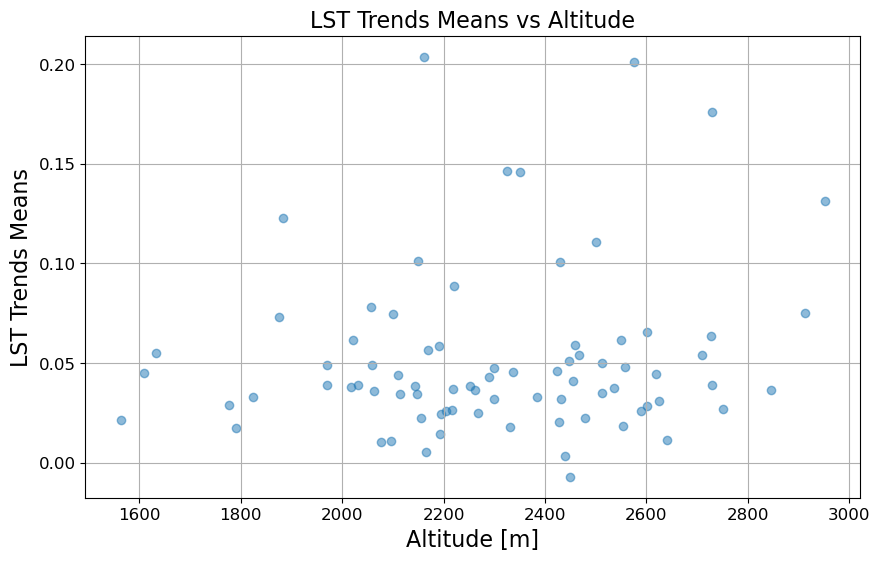

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
file_path = r'E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\analysis\hourly_slopes_mean_st.dev.csv'
file_path2 = r'E:\all folders\STUDIES\UZH\master thesis\IMIS data\new data\new processed data\TSS_30MIN_MEAN_files\Stations covering 2000till 2023\station_slopes.csv'

# Load data
df = pd.read_csv(file_path)
df2 = pd.read_csv(file_path2)

# Set the first column as the index to align data by station names
df.set_index(df.columns[0], inplace=True)
df2.set_index(df2.columns[0], inplace=True)

# Extract the 'mean' and 'altitude' columns by aligning indices
mean_column = df2.iloc[:, 0]  # Assuming mean data is in the first data column after station names in df2
altitude_column = df.iloc[:, 51]  # altitude column at index 51

# Ensure alignment by joining the two dataframes on their indices (station names)
merged_df = pd.DataFrame({'Mean': mean_column, 'Altitude': altitude_column})

# Plot mean with respect to altitude
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Altitude'], merged_df['Mean'], alpha=0.5)
plt.title('LST Trends Means vs Altitude', fontsize=16)
plt.xlabel('Altitude [m]', fontsize=16)
plt.ylabel('LST Trends Means', fontsize=16)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
